# Homework 1

### Setup

In [1]:
import warnings
import pandas as pd
from scipy.io.arff import loadarff

def warn(*args, **kwargs): pass
warnings.warn = warn

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

### 1.

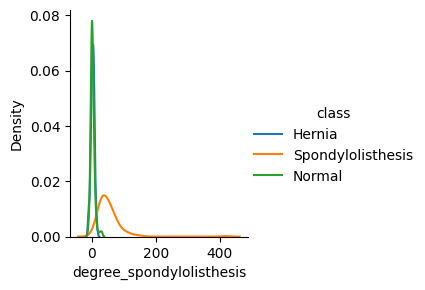

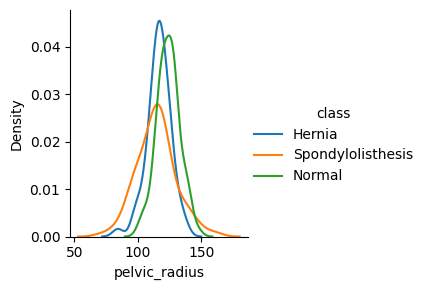

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

fimportance = f_classif(X, y)

highest_d = X.columns.values[max(enumerate(fimportance[0]),key=lambda x: x[1])[0]]
lowest_d = X.columns.values[min(enumerate(fimportance[0]),key=lambda x: x[1])[0]]

plot = sns.FacetGrid(df, hue="class")
plot.map(sns.kdeplot, highest_d).add_legend()
  
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.kdeplot, lowest_d).add_legend()
  
plt.show()

### 2.

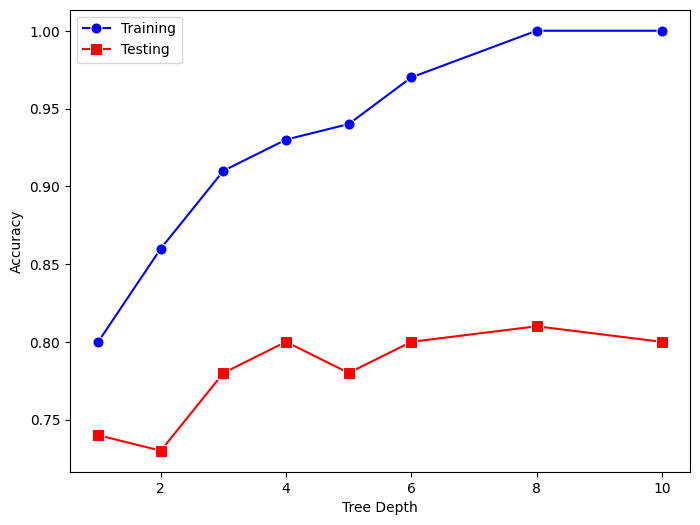

In [3]:
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
depths = [1, 2, 3, 4, 5, 6, 8, 10]
training_accuracy = []
testing_accuracy = []

for depth in depths:
    # Creating the tree
    predictor = tree.DecisionTreeClassifier(max_depth=depth)
    predictor.fit(x_train, y_train)
    
    # Training accuracy
    y_pred = predictor.predict(x_train)
    training_accuracy.append(round(metrics.accuracy_score(y_train, y_pred),2))

    # Testing accuracy
    y_pred = predictor.predict(x_test)
    testing_accuracy.append(round(metrics.accuracy_score(y_test, y_pred),2))

plt.figure(figsize=(8, 6))

sns.lineplot(x=depths, y=training_accuracy, label='Training', marker='o', markersize=8, color='blue')

sns.lineplot(x=depths, y=testing_accuracy, label='Testing', marker='s', markersize=8, color='red')

plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 3.

Analizando o gráfico verificamos que a partir da profundidade 8 existe algum overfitting, a precisão da decision tree para o training set sobe para quase 100%, enquanto a precisão da decision tree para o testing set desce.
A decision tree de profundidade 1 apresenta underfitting, a performance do modelo não é particularmente boa nem para o training set nem para o testing set comparando com as outras profundidades.
O melhor modelo parece ser aquele em que a decision tree tem profundidade 6, a precisão da decision tree para o testing set é máxima e a performance do modelo para o testing set é quase perfeita.

### 4.

#### i.

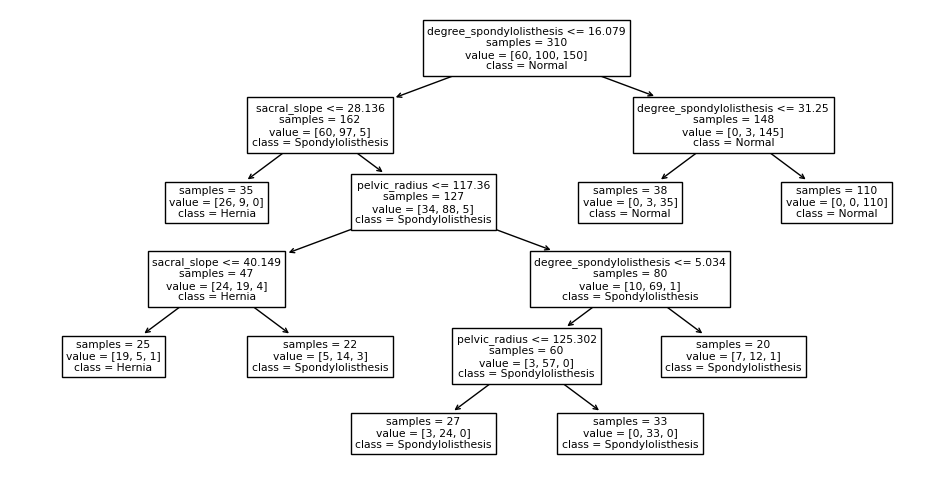

In [4]:

# Creating the tree using all available data and ensuring that each leaf has a minimum of 20 individuals
predictor = tree.DecisionTreeClassifier(min_samples_leaf=20)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=X.columns.values, class_names=y.unique(), impurity=False)
plt.show()

#### ii.

De acordo com a decision tree, para diagonosticar uma paciente com uma hérnia este tem sempre que ter `degree spondylolisthesis` menor ou igual que `16.079`. A partir daqui, a hérnia é caraterizada como uma `sacral slope` menor ou igual que `28.136` ou como uma `sacral slope` maior que `28.136` e menor ou igual que `40.149` em combinação com um `pelvic radius` menor ou igual que `117.36`.